Iris Flower Classification Dataset Used:

- https://www.kaggle.com/datasets/arshid/iris-flower-dataset

Loading the Libraries Needed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Importing the Iris Dataset

In [2]:
df = pd.read_csv("./dataset/IRIS.csv")

Checking the Dataset

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


There is 50 Flowers from Each Class

In [7]:
df[["species"]].value_counts()

species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

There is Not NA or Null Values in the Dataset

In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

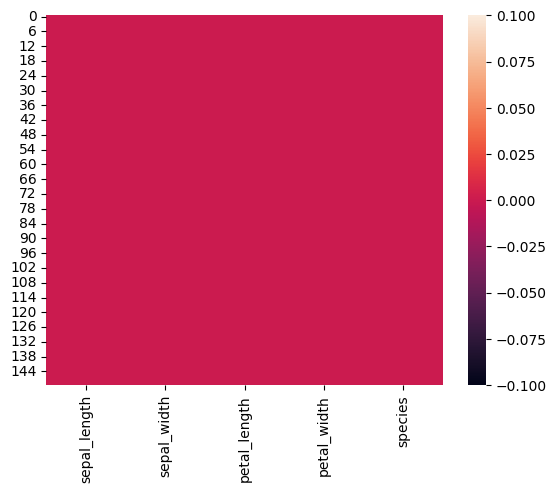

In [9]:
sns.heatmap(df.isnull())

<Axes: >

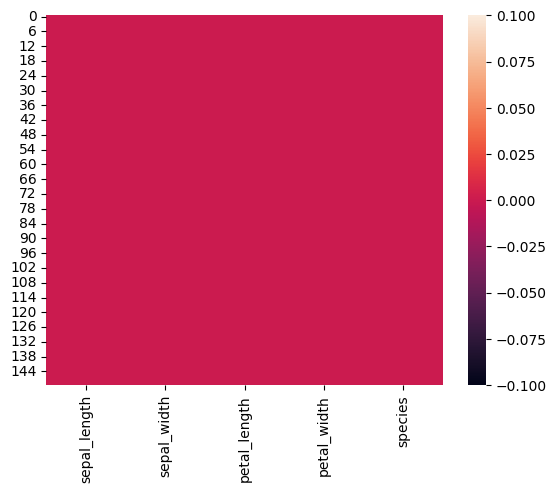

In [10]:
sns.heatmap(df.isna())

There is in Total 150 Flowers in the Dataset

<Axes: >

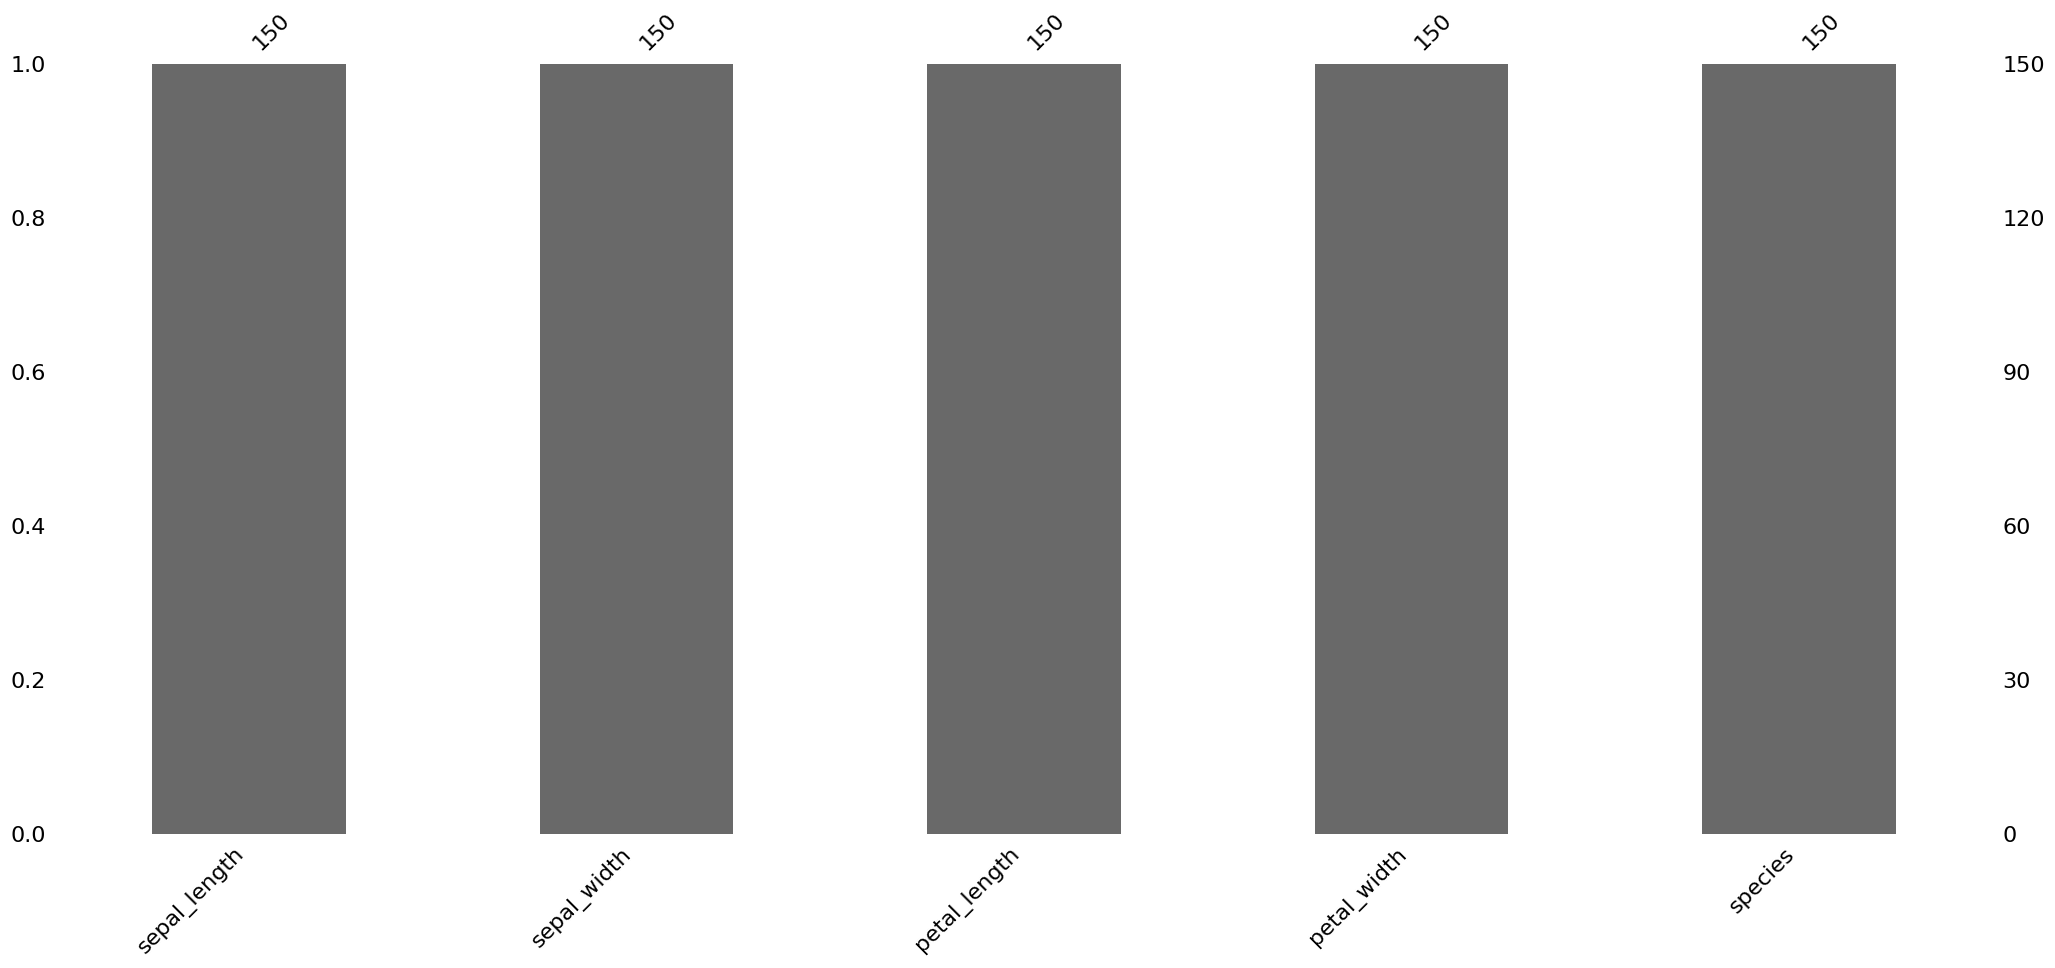

In [11]:
msno.bar(df)

There is 50 Iris-Setosa, 50 Iris-Versicolor and 50 Iris-Virginica in the Dataset, this are going to be saved on another CSV file for Visual Purpose.

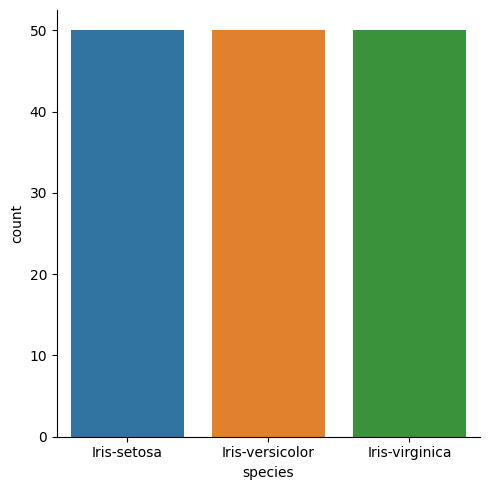

In [12]:
sns.catplot(x="species", data=df, kind="count")

In [43]:
import numpy as np

In [44]:
row_1 = np.array(["Iris-Setosa", 150])
row_2 = np.array(["Iris-Versicolor", 150])
row_3 = np.array(["Iris-Virginica", 150])

data = pd.DataFrame([row_1], columns=["Species", "Class"])

data.loc[len(data.index)] = row_2
data.loc[len(data.index)] = row_3

In [45]:
data

,Species,Class
0,Iris-Setosa,150
1,Iris-Versicolor,150
2,Iris-Virginica,150


In [46]:
data.to_csv("./dataset/iris_classes.csv")

Replacing Each Class in the Species Column to a Numeric Value 0, 1 and 2

In [13]:
df.species = df.species.replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


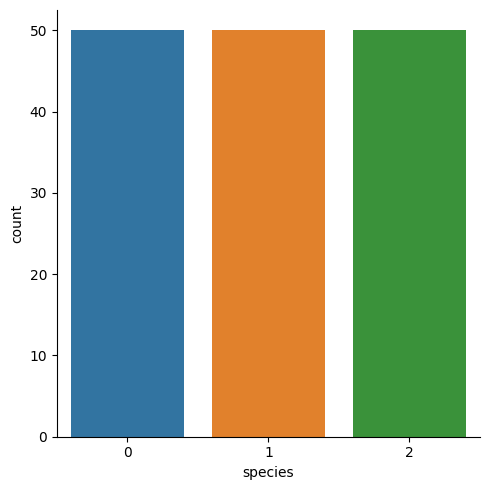

In [15]:
sns.catplot(x="species", data=df, kind="count")

Heatmap of the Dataset

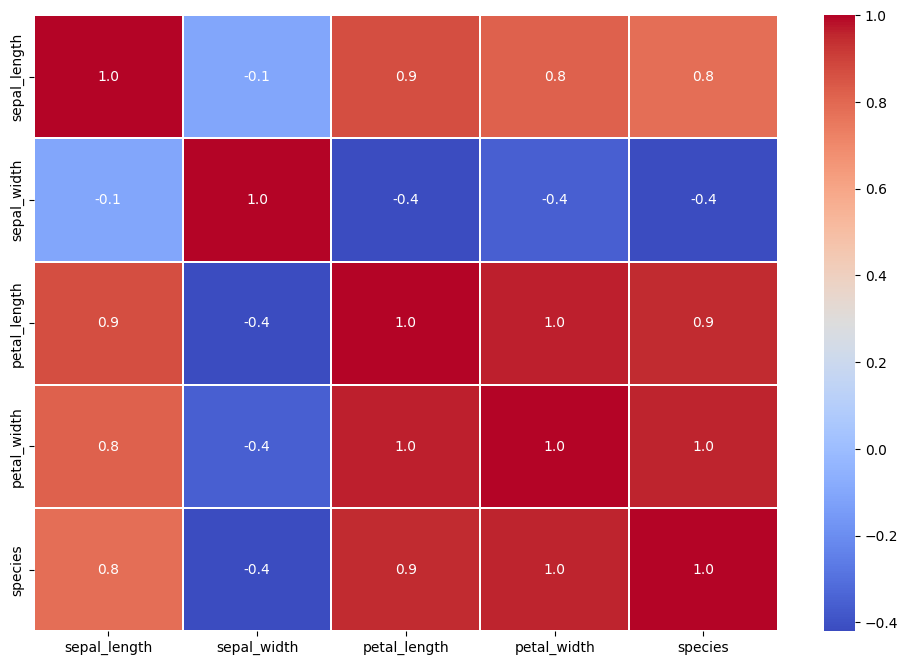

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [17]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [18]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Splitting the Data to Train and Test Datasets, and then Each X Feature is going to be Scaled

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

Importing KNeighborsClassifier Algorithm

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
y_predicted = knn_model.predict(X_test)

In [26]:
score = knn_model.score(X_test, y_test)

print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.9
accuracy_score percent : 90.0


In [27]:
from sklearn.metrics import classification_report

KNeighborsClassifier Validation Results

In [28]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      1.00      0.89        12
           2       1.00      0.62      0.77         8

    accuracy                           0.90        30
   macro avg       0.93      0.88      0.89        30
weighted avg       0.92      0.90      0.89        30



Importing GaussianNB Algorithm

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

GaussianNB Validation Results

In [31]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.79      0.92      0.85        12
           2       0.83      0.62      0.71         8

    accuracy                           0.87        30
   macro avg       0.87      0.85      0.85        30
weighted avg       0.87      0.87      0.86        30



Importing SVC Algorithm

In [32]:
from sklearn.svm import SVC

In [33]:
svm_model = SVC(probability=True)
svm_model = svm_model.fit(X_train, y_train)

SVC Validation Results

In [34]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.85      0.92      0.88        12
           2       0.86      0.75      0.80         8

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



Importing RandomForestClassifier Algorithm

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

RandomForestClassifier()

RandomForestClassifier Validation Results

In [37]:
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      1.00      0.89        12
           2       1.00      0.62      0.77         8

    accuracy                           0.90        30
   macro avg       0.93      0.88      0.89        30
weighted avg       0.92      0.90      0.89        30



Importing SGDClassifier Algorithm

In [38]:
from sklearn.linear_model import SGDClassifier

SGDClassifier Validation Results

In [39]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      1.00      0.89        12
           2       1.00      0.62      0.77         8

    accuracy                           0.90        30
   macro avg       0.93      0.88      0.89        30
weighted avg       0.92      0.90      0.89        30



The SVC Algorithm did the best results, with an accuracy of 90%, so this Model is going to be saved with also the Scaler

In [40]:
import pickle as pkl

In [41]:
pkl.dump(scaler, open(f"./model/scaler.pkl", "wb"))

In [42]:
pkl.dump(svm_model, open(f"./model/iris_model.pkl", "wb"))